# U.S. Airbnb Analysis 

### Cell 1: 
Import standard libraries (numpy, pandas, matplotlib, seaborn) and load `AB_US_2020.csv` into `air2020` selecting a subset of columns; display head.


In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

air2023 = pd.read_csv('AB_US_2023.csv',usecols=['id','name','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count',
                                                                                'availability_365','city'])
air2023.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,San Francisco
1,5858,Creative Sanctuary,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,San Francisco
3,8339,Historic Alamo Square Victorian,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,San Francisco
4,8739,"Mission Sunshine, with Private Bath",37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,San Francisco


### Cell 2: 
Identify numeric and nominal features from `air2020`; adjust `numeric_features` (drops first column) and show dataframe info.

In [50]:
numeric_features = air2023.select_dtypes(include=['int64','float64']).columns
nominal_features = air2023.select_dtypes(include=['object'])
numeric_features=numeric_features.delete(0)

air2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   latitude                        232147 non-null  float64
 3   longitude                       232147 non-null  float64
 4   room_type                       232147 non-null  object 
 5   price                           232147 non-null  int64  
 6   minimum_nights                  232147 non-null  int64  
 7   number_of_reviews               232147 non-null  int64  
 8   last_review                     183062 non-null  object 
 9   reviews_per_month               183062 non-null  float64
 10  calculated_host_listings_count  232147 non-null  int64  
 11  availability_365                232147 non-null  int64  
 12  city            

### Cell 3: 
Show descriptive statistics for `air2020` (describe()).

In [51]:
air2023.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062.000000,232147.000000,232147.000000
mean,2.584580e+17,36.610585,-98.301436,259.468001,13.495867,40.915230,1.638348,29.879055,180.985686
std,3.465985e+17,5.126523,19.706929,1024.645918,27.920631,80.649152,1.910812,106.013665,134.715299
min,6.000000e+00,25.957323,-123.089130,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.638896e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,0.310000,1.000000,52.000000
50%,4.896307e+07,36.190556,-97.727670,149.000000,3.000000,9.000000,1.000000,2.000000,175.000000
75%,6.633014e+17,40.717440,-77.026222,250.000000,30.000000,43.000000,2.420000,10.000000,321.000000
max,8.581014e+17,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,101.420000,1003.000000,365.000000


### Cell 4: 
Compute correlation matrix over numeric columns and plot a seaborn heatmap of correlations.

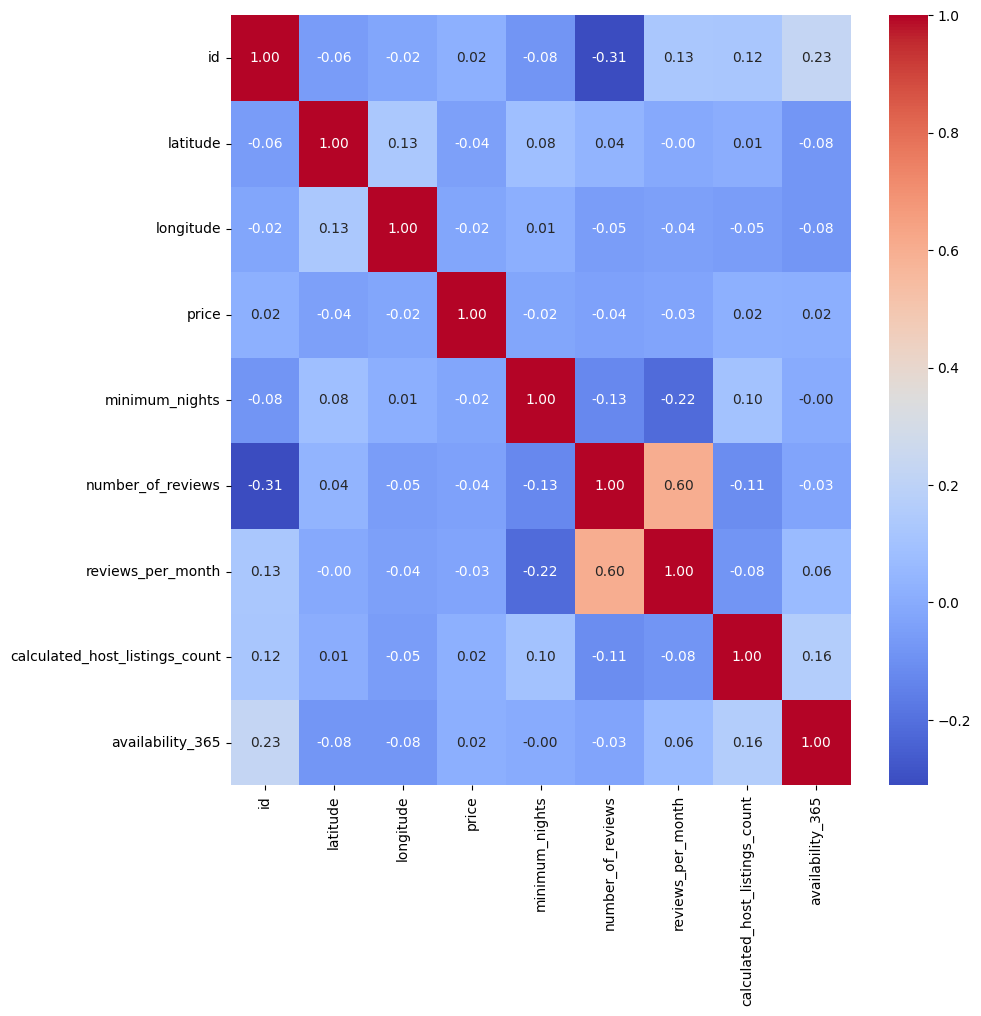

In [52]:
# set figure size
plt.rcParams['figure.figsize'] = (10, 10)

# compute correlation only on numeric columns to avoid converting text columns to floats
corr_mat = air2023.select_dtypes(include=[np.number]).corr()

# plot heatmap
g = sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="coolwarm")

### Cell 5: 
Compute percent missing values per column (count / total rows * 100) and return a DataFrame with percentages.

In [53]:
missing = air2023.isna().sum()

missing /= air2023.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'Precent Of Missing Values'})
missing

,Precent Of Missing Values
id,0.000000
name,0.006892
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000
minimum_nights,0.000000
number_of_reviews,0.000000
last_review,21.143930
reviews_per_month,21.143930


### Cell 6: 
Plot KDE distributions for each numeric feature in `air2020` (one subplot per feature) to inspect distributions and shape.

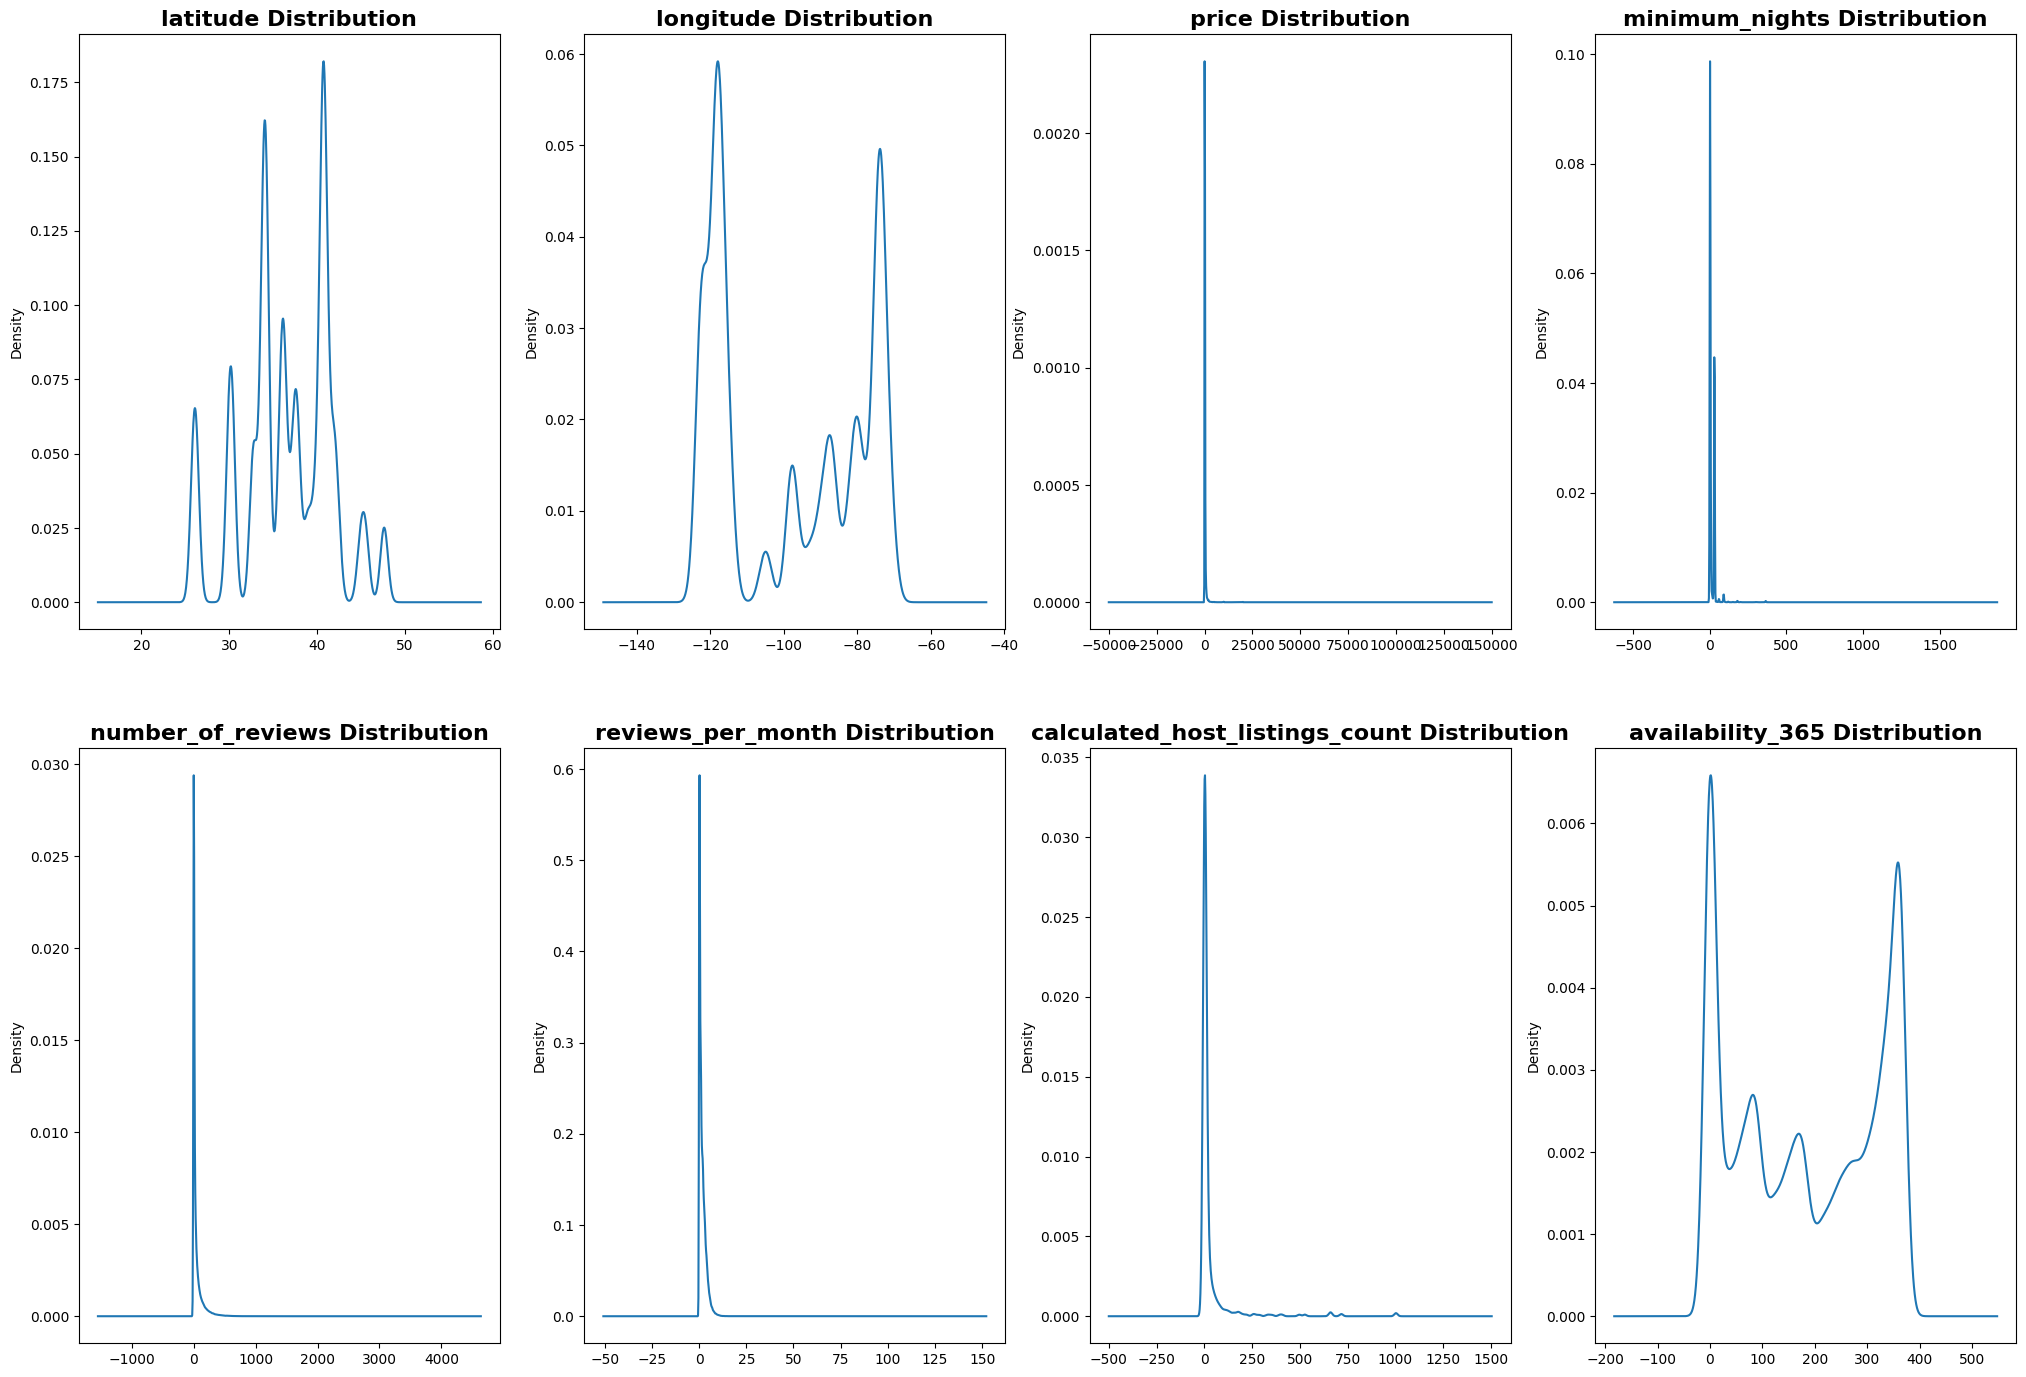

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=4)
aux = 0
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        air2023[numeric_features[aux]].plot(kind='kde',ax=col)
        col.set_title(numeric_features[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1

### Cell 7: 
Remove outliers and create `iqr` filtered DataFrame:

    - Keep listings with price between 25th and 75th percentiles

    - number_of_reviews > 0

    - calculated_host_listings_count < 10

    - number_of_reviews < 200

    - minimum_nights < 10

    - reviews_per_month < 5

    Resulting `iqr` is used for cleaner distributions later.

In [55]:
# Removing Outliers
lower_bound = .25
upper_bound = .75
iqr = air2023[air2023['price'].between(air2023['price'].quantile(lower_bound), air2023['price'].quantile(upper_bound), inclusive='both')]
iqr = iqr[iqr['number_of_reviews'] > 0]
iqr = iqr[iqr['calculated_host_listings_count'] < 10]
iqr = iqr[iqr['number_of_reviews'] < 200]
iqr = iqr[iqr['minimum_nights'] < 10]
iqr = iqr[iqr['reviews_per_month'] < 5]

### Cell 8: 
Plot KDE distributions for numeric features on the filtered `iqr` dataset and set x-limits for non-lat/lon features to reduce long tails.

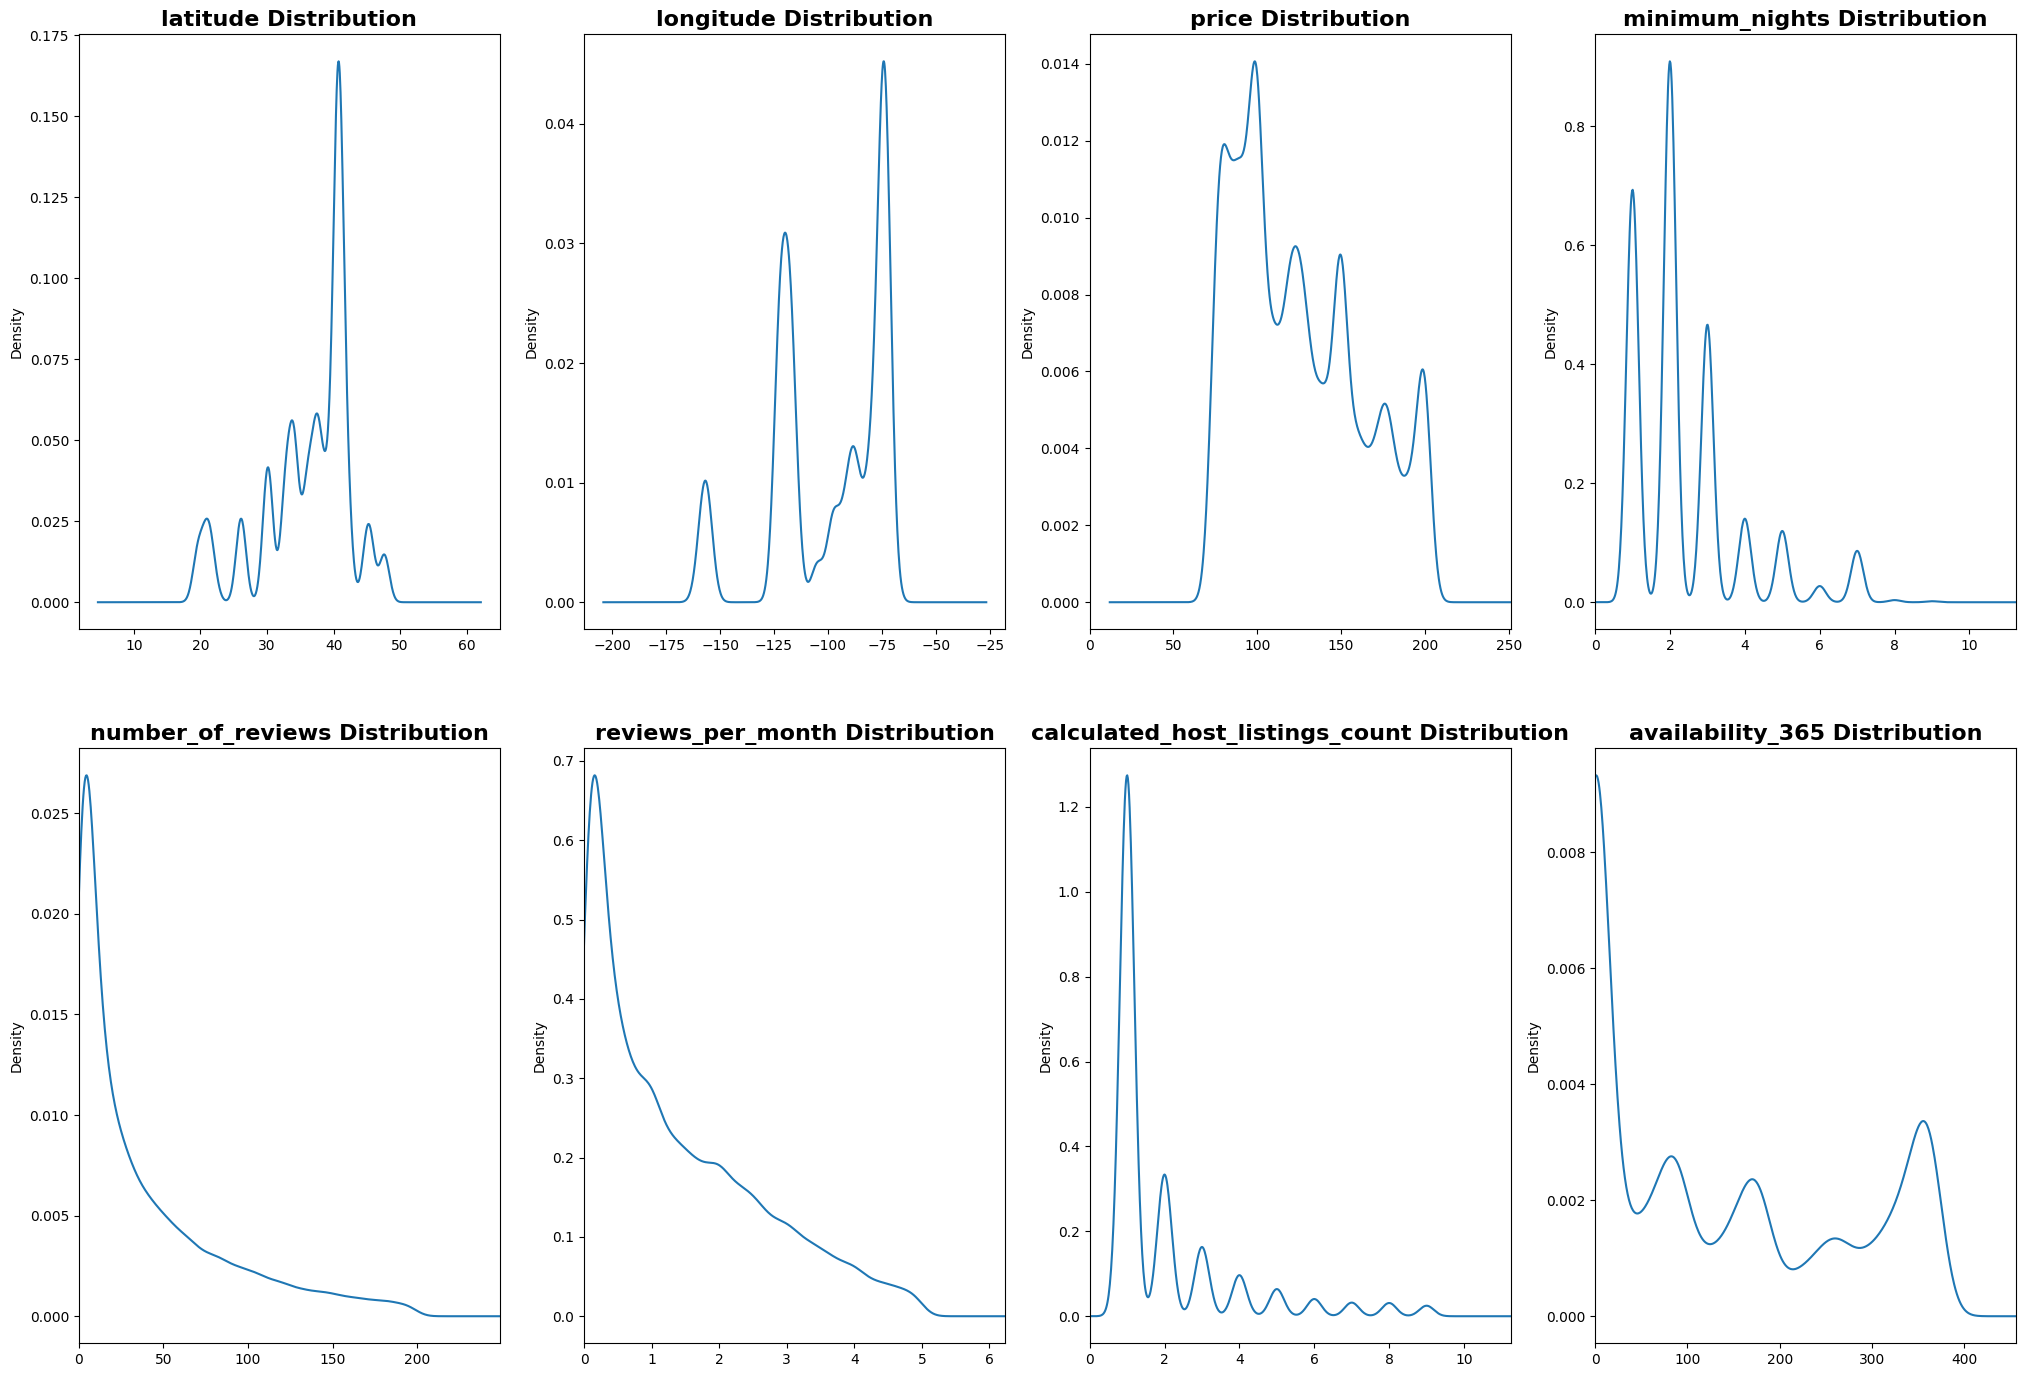

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4)
aux = 0
fig.set_figheight(17)
fig.set_figwidth(25)
for row in axes:
    for col in row:
        iqr[numeric_features[aux]].plot(kind='kde',ax=col)
        if numeric_features[aux] not in ['latitude','longitude']:
            col.set_xlim(0,iqr[numeric_features[aux]].max()+iqr[numeric_features[aux]].max()*0.25)
        col.set_title(numeric_features[aux] +' Distribution',fontsize=16,fontweight='bold')
        aux+=1


After removing most of the outliers, the remaining data shows clearer and more meaningful distributions that allow for better insight. The number_of_reviews and reviews_per_month features follow an exponential distribution, while the other numeric features appear multimodal. This is expected, as the dataset likely contains multiple underlying groups, such as different locations, contributing to these patterns.

### Cell 9: 
Copy `iqr` to `pr_data`, compute descriptive stats, attempt to add skew & kurtosis rows to `desc` and display (note: code overwrites 'skew' with kurtosis; see notes).


In [18]:
pr_data =iqr.copy()
desc = pr_data.describe()
desc.loc['skew'] = desc.skew()
desc.loc['skew'] = desc.kurt()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

desc.drop(columns='id').style.highlight_max(axis=1)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,57440.000000,57440.000000,57440.000000,57440.000000,57440.000000,57440.000000,57440.000000,57440.000000
mean,36.291368,-99.256249,125.050696,2.403325,39.306198,1.362309,1.979318,134.128673
std,6.663606,25.645191,37.128357,1.458450,45.317123,1.239642,1.732847,134.011385
min,18.982320,-159.711430,75.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,32.787785,-118.389465,95.000000,1.000000,5.000000,0.290000,1.000000,0.000000
50%,37.804000,-90.092180,120.000000,2.000000,20.000000,1.000000,1.000000,89.000000
75%,40.732955,-73.989050,150.000000,3.000000,59.000000,2.160000,2.000000,259.000000
max,47.734620,-70.995950,201.000000,9.000000,199.000000,4.990000,9.000000,365.000000
skew,8.999983,8.999772,8.999756,9.000000,8.999738,9.000000,9.000000,8.998915


### Cell 10: 
Create an interactive Plotly figure:

    - Scattergeo map of listings (lat/lon) colored as markers (price in hover text)

    - Bar charts for room type and minimum nights distributions

    - Configure geographic projection and layout; display interactive figure

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go


fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.6, 0.5],
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "bar"}]])

fig.add_trace(
    go.Bar(y=pr_data.room_type.value_counts(),x=pr_data.room_type.value_counts().index,name='Room Type'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(y=pr_data.minimum_nights.value_counts(),x=pr_data.minimum_nights.value_counts().index,name='Minimum Nights'),
    row=2, col=2
)

fig.add_trace(
    #go.Scatter3d(x=pr_data.longitude, y=pr_data.latitude,z=pr_data.price,color=pr_data.room_type,mode='markers'),
    go.Scattergeo(lat=pr_data["latitude"],
                  lon=pr_data["longitude"],
                  mode="markers",
                  text=pr_data.price,
                  hoverinfo="text",
                  showlegend=True,
                  name='Price'
                  ,
                  marker=dict(color="crimson", size=4, opacity=0.8)),
    row=1, col=1
)

fig.update_geos(
    projection_type="orthographic",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue",
    projection_rotation_lon=-92,
    projection_rotation_lat=15

)

fig.update_xaxes(tickangle=45)

fig.update_layout(title='Distribution Of Different Room Types')
fig.show()

### Cell 11: 
Use seaborn countplot to show counts per `city` in `pr_data`; format y tick labels and title.

/var/folders/6t/jmjb93cs4_b5p0zx5qdjhjqr0000gn/T/ipykernel_11747/3778353882.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/6t/jmjb93cs4_b5p0zx5qdjhjqr0000gn/T/ipykernel_11747/3778353882.py:2: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



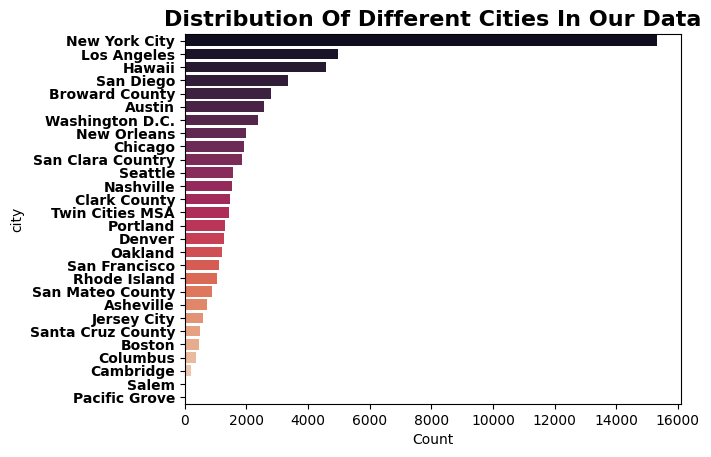

In [29]:
ax = sns.countplot(y=pr_data['city'],order=pr_data['city'].value_counts().index,palette='rocket')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=10,fontweight='bold')
ax.set_title('Distribution Of Different Cities In Our Data',fontsize=16,fontweight='bold')
ax.set_xlabel('Count',fontsize=10)
#ax.set_title()
plt.show()

### Cell 12: 
Map specific city names to US state abbreviations using `states_dic` and create a new `state` column in `pr_data`.


In [30]:
states_dic = {'Asheville':'NC','Austin':'TX','Boston':'MA','Broward County':'FL','Cambridge':'MA','Chicago':'IL','Clark County':'NV','Columbus':'OH','Denver':'CO','Hawaii':'HI','Jersey City':'NJ',
             'Los Angeles':'SC','Nashville':'TN','New Orleans':'MS','New York City':'NY','Oakland':'CA','Pacific Grove':'CA','Portland':'OR','Rhode Island':'RI','Salem':'MA','San Clara Country':'CA',
             'Santa Cruz County':'CA','San Diego':'CA','San Francisco':'CA','San Mateo County':'CA','Seattle':'WA','Twin Cities MSA':'MN','Washington D.C.':'DC'}

pr_data['state'] = pr_data['city'].apply(lambda x : states_dic[x])

### Cell 13: 
Plot a Plotly Express choropleth of listing counts per state (uses `pr_data['state']` counts) scoped to USA.

In [32]:
import plotly.express as ex

counts = pr_data['state'].value_counts()
fig = ex.choropleth(locations=counts.index,color=counts.values, locationmode="USA-states", scope="usa",title='Number Of Listings By State ', color_continuous_scale=ex.colors.diverging.Portland)
fig.show()

Most of the listings in the dataset are cities in the New York state



### Cell 14: 
Compute average listing price per state (`g_dat`) from `pr_data` and plot a Plotly Express choropleth of average price by state.

In [37]:
# compute average price per state (aggregate only the numeric 'price' column)
g_dat = pr_data.groupby('state', as_index=False)['price'].mean()

fig = ex.choropleth(
	locations=g_dat['state'],
	color=g_dat['price'],
	locationmode="USA-states",
	scope="usa",
	title='Average Listing Price At Each State',
	color_continuous_scale=ex.colors.diverging.Portland
)
fig.show()

A few states have average prices that differ notably from the rest. Hawaii stands out with the highest average price, while Oregon has the lowest.

### Cell 15
Load `AB_US_2023.csv` into `air2023`. Compute `room_type` counts for 2020 and 2023, build `compare_rooms` DataFrame, and plot a bar chart comparing counts across years.

/var/folders/6t/jmjb93cs4_b5p0zx5qdjhjqr0000gn/T/ipykernel_12685/3566035875.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  air2020 = pd.read_csv("AB_US_2020.csv")


<Figure size 1000x600 with 0 Axes>

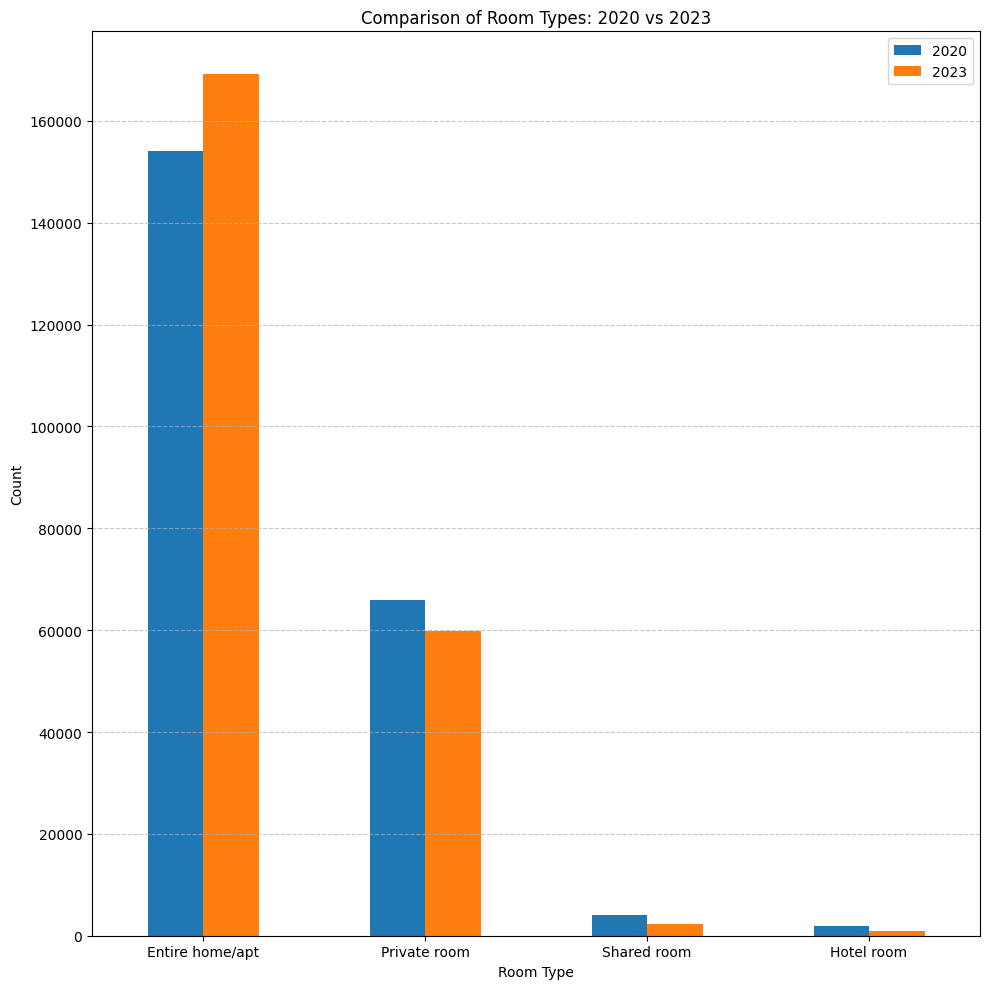

In [56]:
air2020 = pd.read_csv("AB_US_2020.csv")

room_2020 = air2020['room_type'].value_counts()
room_2023 = air2023['room_type'].value_counts()

compare_rooms = pd.DataFrame({
    '2020': room_2020,
    '2023': room_2023
}).fillna(0)

plt.figure(figsize=(10, 6))
compare_rooms.plot(kind='bar')

plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Comparison of Room Types: 2020 vs 2023')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In 2023, listings declined across all room types compared to 2020, except for entire home/apartment listings, which increased. This suggests a shift in the market toward full-unit rentals, while private and shared room offerings became less common.

### Cell 16
For `air2023`:
   
    - Compute average price per city, identify top 3 most expensive and bottom 3 least expensive cities
    
    - Plot KDE price distributions for those cities (solid for top 3, dashed for bottom 3)
    
    - Adjust x-axis limits to focus on price range.

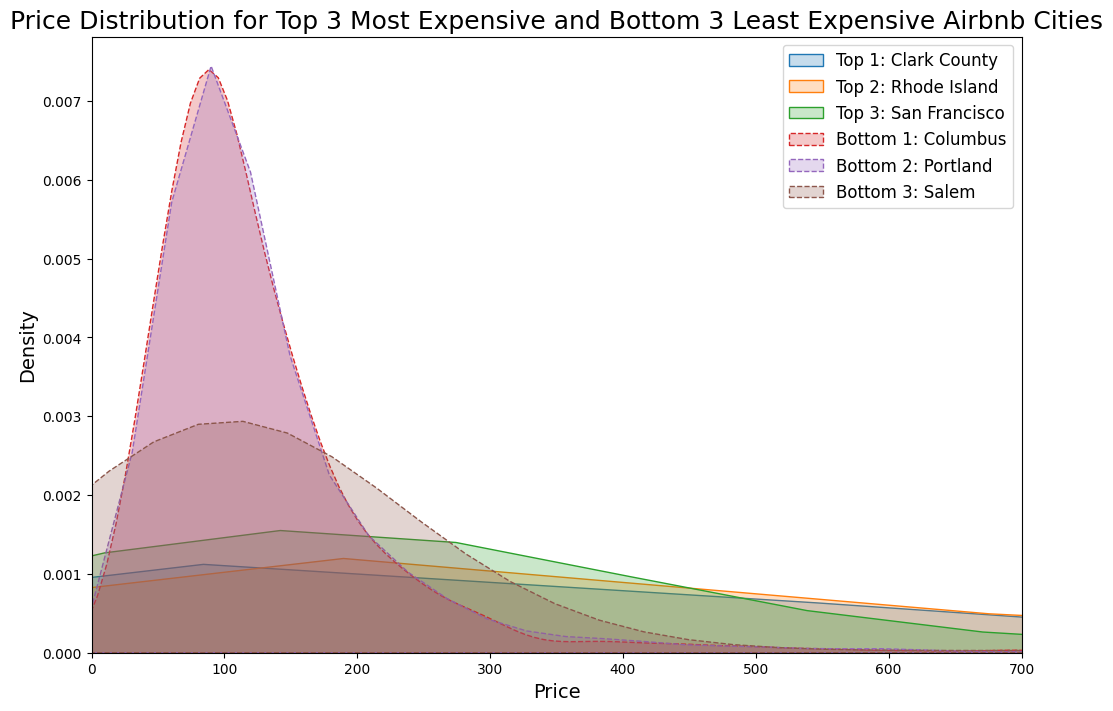

In [43]:
# Calculate the average price per city
average_prices = air2023.groupby('city')['price'].mean()

# Get the top 3 most expensive cities
top_expensive_cities = average_prices.sort_values(ascending=False).head(3).index

# Get the bottom 3 least expensive cities
least_expensive_cities = average_prices.sort_values(ascending=True).head(3).index

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the kernel density estimate (KDE) for the top 3 most expensive cities with rank
for rank, city in enumerate(top_expensive_cities, start=1):
    subset = air2023[air2023['city'] == city]
    sns.kdeplot(subset['price'], fill=True, label=f'Top {rank}: {city}', ax=ax)

# Plot the kernel density estimate (KDE) for the bottom 3 least expensive cities with rank
for rank, city in enumerate(least_expensive_cities, start=1):
    subset = air2023[air2023['city'] == city]
    sns.kdeplot(subset['price'], fill=True, linestyle='--', label=f'Bottom {rank}: {city}', ax=ax)

# Add labels and title
ax.set_title('Price Distribution for Top 3 Most Expensive and Bottom 3 Least Expensive Airbnb Cities', fontsize=18)
ax.set_xlabel('Price', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Add legend
ax.legend(fontsize=12)

ax.set_xlim(0, 700)

# Adjust x-axis limits for better visibility
ax.set_xlim(left=0)

# Show the plot
plt.show()
